<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 03
## Clase 04: Visualización Interactiva

## Objetivos

* Agregar valor a las visualizaciones con interactividad.

## Contenidos
* [Jupyter Widget](#widgets)
    - [Instalación](#installation)
    - [Algunos Widgets](#some-widgets)
* [Altair Interactivo](#interactive_altair)

## Jupyter Widgets
<a id='widgets'></a>

Ya sabemos que no hay mejor manera de describir algo que la forma con que los autores lo hacen, en el [respositorio](https://github.com/jupyter-widgets/ipywidgets) del proyecto nos cuentan lo siguiente: 

_ipywidgets are interactive HTML widgets for Jupyter notebooks and the IPython kernel._

_Notebooks come alive when interactive widgets are used. Users gain control of their data and can visualize changes in the data._

_Learning becomes an immersive, fun experience. Researchers can easily see how changing inputs to a model impact the results. We hope you will add ipywidgets to your notebooks, and we're here to help you get started._

Toda la documentación la puedes encontrar en el siguiente [link](https://ipywidgets.readthedocs.io).

En resumen, los _widgets_ son mini-herramientas que brindan interactividad. En esta clase los utilizaremos para visualizaciones, con tal de entregar mayour control y facilitar la exploración.

Para motivar el uso de estos, se hará uso del __Atractor de Lorenz__.

We explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

Let's change (\\(\sigma\\), \\(\beta\\), \\(\rho\\)) with ipywidgets and examine the trajectories.

In [1]:
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from lorenz import solve_lorenz

%matplotlib inline

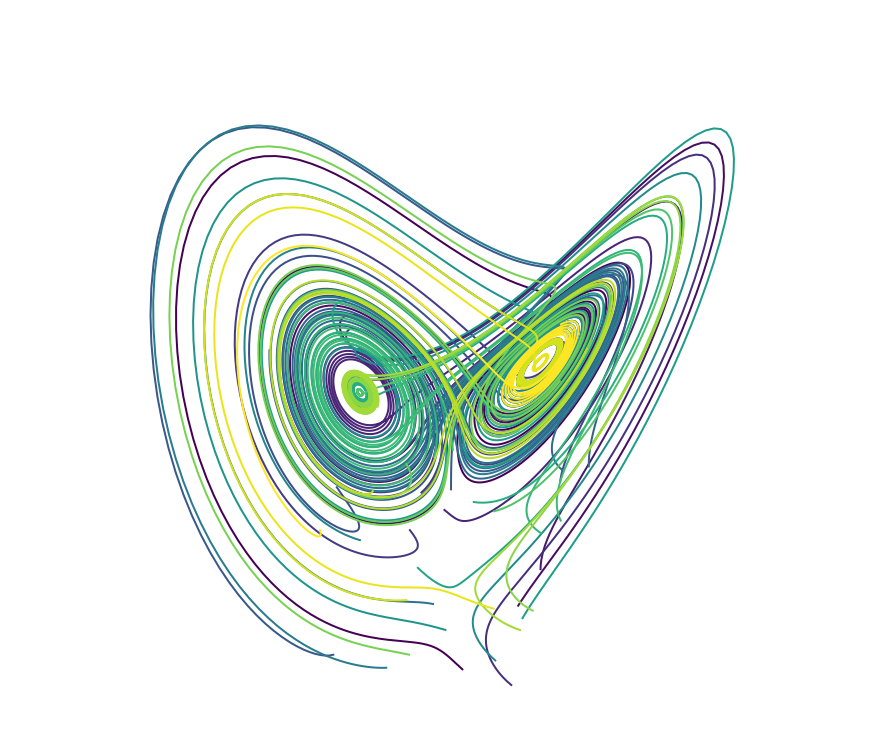

In [3]:
w=interactive(solve_lorenz,sigma=(0.0,50.0),rho=(0.0,50.0))
w

Para el conjunto de parámetros por defecto observamos trayectorias girando alrededor de dos puntos, llamados atractores.

El objeto devuelto por `interactive` es de tipo `Widget` y posee atributos que contienen el resultado actual y los argumentos.

In [3]:
t, x_t = w.result

In [4]:
w.kwargs  ## Cambia el valor de algún widget de w y vuelve a ejecutar esta celda, verás que el valor cambió.

{'sigma': 10.0, 'beta': 2.6666666666666665, 'rho': 28.0}

### Instalación
<a id='installation'></a>

En la [documentación](https://ipywidgets.readthedocs.io/en/latest/user_guide.html) oficial se encuentra detallada la forma de instalar `ipywidgets`.

Para efectos del curso, se instalará en el mismo ambiente virtual que se ha utilizado a lo largo del semestre. Las instrucciones son:

1. En la terminal correspondiente activa el entorno virtual del curso, es decir, ejecuta `conda activate mat281`.
2. Ejecutar en la terminal `conda install -c conda-forge ipywidgets`, recuerda que `mat281` es el nombre del ambiente virtual.
3. Si has seguido todas las instrucciones ya deberías tener instalado `nodejs`, puedes verificarlo ejecutando `conda list nodejs`, ahí debería aparecer la versión instalada.
4. En la misma terminal (con el ambiente activado, no lo olvides!) ejecuta `jupyter labextension install @jupyter-widgets/jupyterlab-manager`

### Algunos Widgets
<a id='some-widgets'></a>

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#### Interact

La función `interact` crea automáticamente una interfaz de usuario (UI) de control para explorar código y datos interactivatemente.

In [6]:
def f(x):
    return x

`interact` genera automáticamente la interfaz dde control y luego llama a la función utilizando esos parámetros como argumentos para la función.

In [7]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Si el argumento es booleano crea una _checkbox_ en lugar de un _slicer_.

In [8]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

Si se le entrega un string `interact` genera un _text box_.

In [9]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

Otra manera es utilizar `interact` como un _decorator_. Esto permite definir una función e interactuar con ella en un solo paso.

Los decoradores se escapan de los contenidos del curso, pero básicamente son funciones tienen como argumento una función y extienden el comportamiento de esta última sin modificarla explícitamente.

In [10]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

#### Interactive

Además de `ìnteract`, IPython proporciona otra función, `interactive`, que es útil cuando desea reutilizar los widgets que se producen o acceder a los datos vinculados a los controles de la interfaz de usuario.

In [11]:
from IPython.display import display

In [12]:
def f(a, b):
    output = a + b
    display(output)
    return output

In [13]:
w = interactive(f, a=10, b=20)

In [14]:
type(w)

ipywidgets.widgets.interaction.interactive

In [15]:
w.children  # The children of the interactive are two integer-valued sliders and an output widget

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

Para ver el widget, basta con utilizar la función `display` de IPython.

In [16]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

Finalmente, un ejemplo con un gráfico:

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))

In [18]:
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

Si quisieras por ejemplo, que la pendiente `m` solo sean números enteros y que el coeficiente de posición `b` solo pueda ser escogido entre 0 y 3 puedes explicitar el tipo de widget para cada argumento.

Más detalle en la documentación! [Link](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#Widget-abbreviations)

In [19]:
interactive(
    f,
    m=widgets.IntSlider(0, -2, 2),
    b=widgets.Dropdown(options=[0, 3])
)

interactive(children=(IntSlider(value=0, description='m', max=2, min=-2), Dropdown(description='b', options=(0…

## Altair Interactivo
<a id='interactive_altair'></a>

In [20]:
import altair as alt
from vega_datasets import data

Para que un gráfico en altair sea interactivo basta con agregar al final del chart el método `.interactive()`. Para agregar mayor interactividad el _encoding_ `tooltip` es de mucha ayuda.

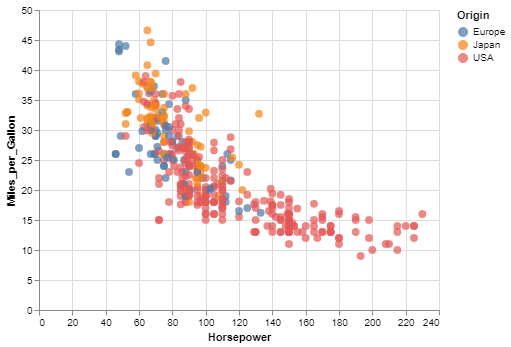

In [21]:
source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

También es posible crear selecciones entrelazadas.

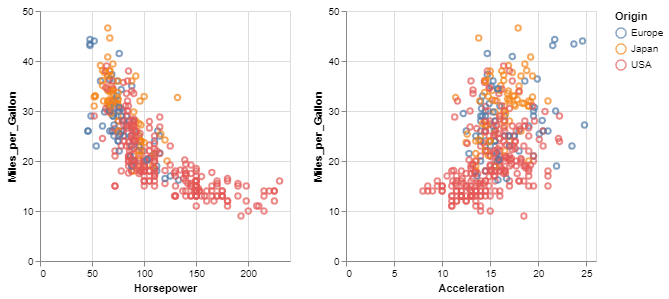

In [22]:
source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')

O que la selección repercuta en otro tipo de gráfico.

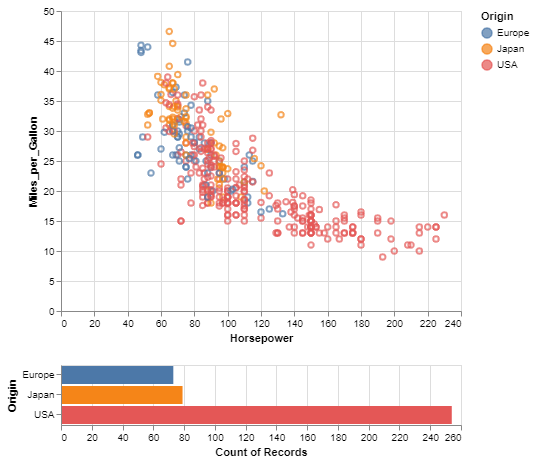

In [23]:
source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

points & bars

Podríamos estar horas hablando de esto. Como siempre, más ejemplos en la galería de ejemplos, en particular la [Sección de Gráficos Interactivos](https://altair-viz.github.io/gallery/index.html#interactive-charts).

_Interactive Chart with Cross-Highlight_

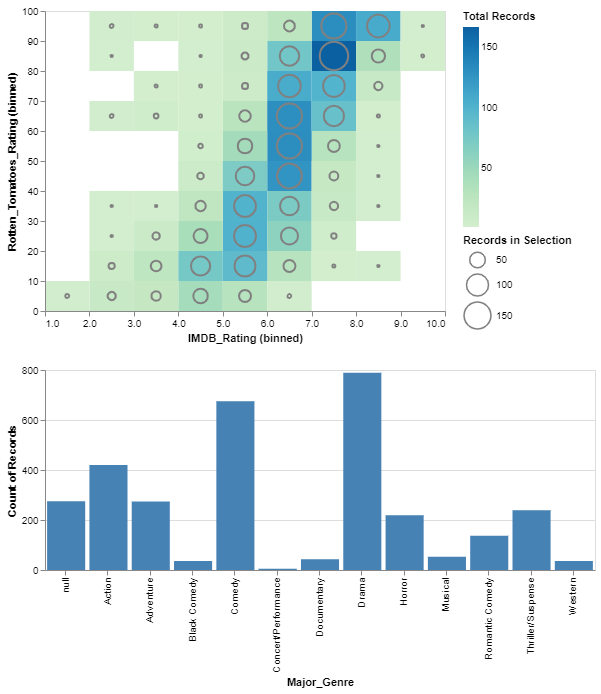

In [24]:
source = data.movies.url

pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(data.movies.url).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Major_Genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)

_Multi-Line Tooltip_

In [25]:
import pandas as pd

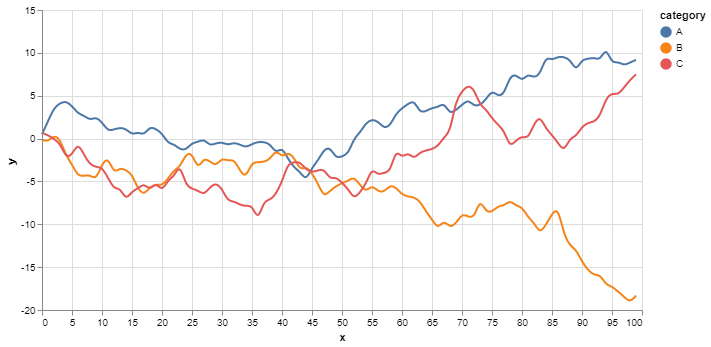

In [26]:
np.random.seed(42)
source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
source = source.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)